In [1]:
# natural language processing
# 1. collect data
# 2. featurize
# 3. compare features

# vectors can be created out of bads of words
# cosine similarity can be used on vectors to determine 
# similarity

# Term Frequency (TR) - 
# import of the term within that document
# TF(d,t) = number of occurences of term t in document d

# Inverse Document Frequency (TR) - 
# importance of the term in the corpus
# IDF(t) = log(D/t) where
# D = total number of documents
# t = number of ducments with the team

In [2]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


In [4]:
fpath = '/Users/bcutrell/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Natural-Language-Processing/smsspamcollection/SMSSpamCollection'
messages = [ line.rstrip() for line in open(fpath, encoding='utf-8')]

In [5]:
len(messages)

5574

In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
messages = pd.read_csv(fpath, sep='\t', names=['label', 'message'])

In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

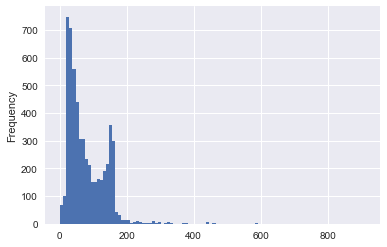

In [11]:
messages['length'] = messages['message'].apply(len)
messages['length'].plot.hist(bins=100)

In [12]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [13]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111797dd8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115258dd8>], dtype=object)

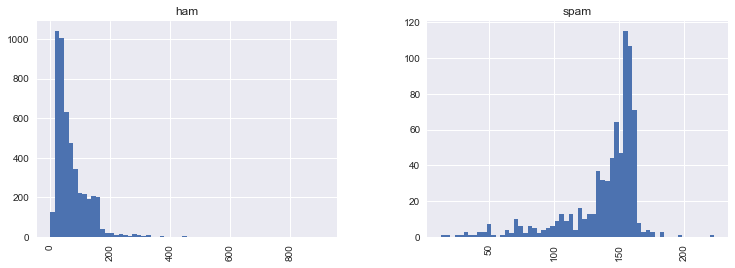

In [14]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

In [15]:
# Spam messages tend to have more characters
# so length appears to be a good feature

In [16]:
import string

In [17]:
mess = 'Sample message! Notice: it has punctuation.'

In [18]:
nopunc = [c for c in mess if c not in string.punctuation]

In [19]:
from nltk.corpus import stopwords # stopwords.words('en')

In [20]:
nopunc = ''.join(nopunc)

In [21]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [22]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [23]:
def text_process(mess):
    '''
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    '''
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [26]:
# stemming can also be used to combine 
# like words (running, ran, run)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [29]:
mess4 = messages['message'][3]

In [30]:
print(mess4)

U dun say so early hor... U c already then say...


In [31]:
bow4 = bow_transformer.transform([mess4])

In [32]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [33]:
print(bow4.shape)

(1, 11425)


In [34]:
bow_transformer.get_feature_names()[4068]

'U'

In [35]:
messages_bow = bow_transformer.transform(messages['message'])

In [36]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [37]:
messages_bow.nnz

50548

In [38]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [40]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [41]:
tfidf4 = tfidf_transformer.transform(bow4)

In [42]:
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [43]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [44]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [45]:
# messages are now numerical vectors

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [48]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [49]:
messages['label'][3]

'ham'

In [50]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [51]:
from sklearn.cross_validation import train_test_split

/Users/bcutrell/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
X = messages['message']
y = messages['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [55]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1155b06a8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [56]:
predictions = pipeline.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1475
       spam       1.00      0.65      0.79       197

avg / total       0.96      0.96      0.96      1672



In [59]:
# precision (also called positive predictive value) 
# is the fraction of relevant instances among the retrieved instances
# true positives / false positives

# recall (also known as sensitivity) is the fraction of relevant instances 
# that have been retrieved over the total amount of relevant instances.
# true positives / total relevant

In [60]:
##############################
# Project
##############################

In [62]:
fpath = '/Users/bcutrell/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Natural-Language-Processing/yelp.csv'
yelp = pd.read_csv(fpath)

In [63]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [64]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [65]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [68]:
yelp["text_length"] = yelp["text"].apply(lambda x: len(x))

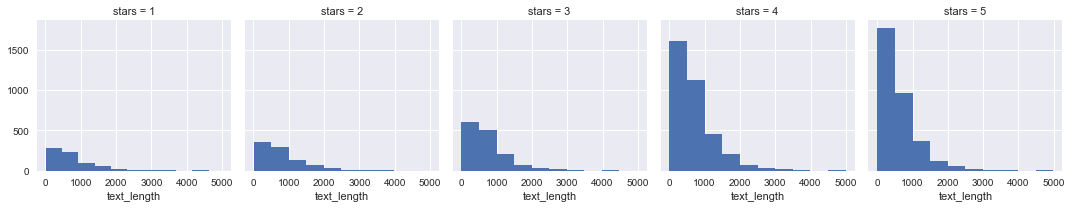

In [70]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text_length')

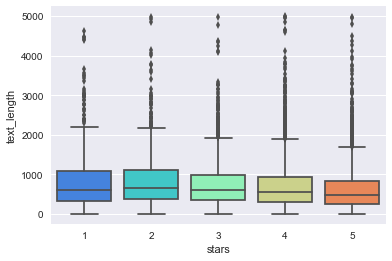

In [72]:
sns.boxplot(x='stars',y='text_length',data=yelp,palette='rainbow')

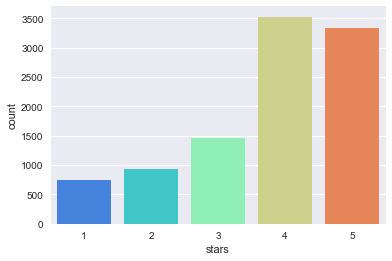

In [73]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [74]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [75]:
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


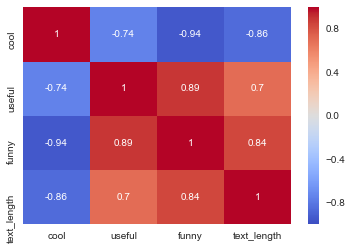

In [76]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In [77]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [78]:
X = yelp_class['text']
y = yelp_class['stars']

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [80]:
X = cv.fit_transform(X)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [82]:
nb = MultinomialNB()

In [83]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
predictions = nb.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix,classification_report

In [87]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [88]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [89]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [90]:
predictions = pipeline.predict(X_test)

In [91]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/bcutrell/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
